In [15]:
import scanpy as sc
import squidpy as sq
import matplotlib as plt
import seaborn as sns
import anndata
import numpy as np

In [2]:
original = sc.read_h5ad("/work/rwth1209/dana_projects/test_new_imputation_tools/enVI/ref/complete_spatial_vk12_coarse_annotation.h5ad")
scref = sc.read_h5ad('/work/rwth1209/dana_projects/test_new_imputation_tools/enVI/ref/snRNA_teichman_atlas_normalized.h5ad')

In [3]:
import hdf5plugin
sp_imp = anndata.read_h5ad('/work/rwth1209/dana_projects/test_new_imputation_tools/enVI/save_as_df/imputed_adata_5000.h5ad')

In [5]:
sp_imp

AnnData object with n_obs × n_vars = 217184 × 5126
    obs: 'fov', 'volume', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'Cellbound2_raw', 'Cellbound2_high_pass', 'Cellbound3_raw', 'Cellbound3_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'Cellbound1_raw', 'Cellbound1_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'region', 'n_counts', 'leiden_0_5', 'leiden_1', 'leiden_1_5', 'tacco', 'cell_type'
    obsm: 'COVET', 'COVET_SQRT', 'envi_latent', 'spatial'

In [6]:
wrong_genes = ['CYRIB', 'MARCHF1', 'PRANCR']

In [7]:
#that are withhalded
genes = ["PLIN1","F13A1","NKG7","MMRN1","NRAP"]

"PLIN1","F13A1","NKG7","MMRN1","NRAP"

In [8]:
sp_imp

AnnData object with n_obs × n_vars = 217184 × 5126
    obs: 'fov', 'volume', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'Cellbound2_raw', 'Cellbound2_high_pass', 'Cellbound3_raw', 'Cellbound3_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'Cellbound1_raw', 'Cellbound1_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'region', 'n_counts', 'leiden_0_5', 'leiden_1', 'leiden_1_5', 'tacco', 'cell_type'
    obsm: 'COVET', 'COVET_SQRT', 'envi_latent', 'spatial'

In [11]:
sp_imp.obsm['spatial']

array([[ 8441.26375141,  9878.23547689],
       [ 8865.42826458,  9585.35767191],
       [ 8877.62777876,  9585.51787909],
       ...,
       [ 1634.56090982, 11290.97182898],
       [ 1629.70887799, 11303.58821451],
       [ 1595.13010413, 11248.05785687]])

In [12]:
sp_imp.obsm['spatial'].shape

(217184, 2)

In [13]:
sq.pl.spatial_scatter(sp_imp,color="cell_type", shape=None, figsize=(10, 10))

/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


In [18]:
sp_imp.obs

fov       volume        min_x         min_y  \
3325265900001100060    23   469.185540  8438.481700   9873.034558   
3325265900002100001    22  2886.628438  8857.740244   9573.972300   
3325265900002100002    22  2579.211312  8870.218588   9574.055711   
3325265900002100007    22  1320.019062  8888.215800   9582.861523   
3325265900002100009    22  1609.002058  8850.977646   9587.223310   
...                   ...          ...          ...           ...   
3325268800171100158  2450  1048.352399  1637.162880  11271.543084   
3325268800171100163  2449   216.193848  1617.489601  11275.924214   
3325268800171100167  2450  1608.858523  1627.009311  11284.049632   
3325268800171100171  2450   680.650653  1623.905173  11299.376840   
3325268800171200040  2449   425.711589  1591.046129  11244.735134   

                           max_x         max_y  anisotropy  transcript_count  \
3325265900001100060  8444.527629   9883.167257    1.978525                 3   
3325265900002100001  8872.406847   9601.736165    1.945604                27   
3325265900002100002  8886.064568   9596.320409    1.491581                16   
3325265900002100007  8900.279321   9597.083624    1.183200                 5   
3325265900002100009  8862.910012   9604.361235    1.415872                 5   
...                          ...           ...         ...               ...   
3325268800171100158  1650.310945  11283.536428    1.165992                32   
3325268800171100163  1624.759867  11281.315174    2.304225                22   
3325268800171100167  1641.582483  11298.187850    1.198896                16   
3325268800171100171  1634.152356  11308.556754    1.437629                16   
3325268800171200040  1599.680151  11251.650544    1.314490                 4   

                     perimeter_area_ratio  solidity  ...  \
3325265900001100060              0.616233  6.605239  ...   
3325265900002100001              0.275619  5.914615  ...   
3325265900002100002              0.247222  6.753856  ...   
3325265900002100007              0.328241  6.891664  ...   
3325265900002100009              0.302887  6.924438  ...   
...                                   ...       ...  ...   
3325268800171100158              0.393974  6.597903  ...   
3325268800171100163              0.941618  6.561603  ...   
3325268800171100167              0.304226  6.799355  ...   
3325268800171100171              0.472838  6.868844  ...   
3325268800171200040              0.619444  6.435970  ...   

                     Cellbound1_high_pass      DAPI_raw  DAPI_high_pass  \
3325265900001100060          1.750160e+05  2.550569e+07    4.059211e+05   
3325265900002100001          9.769555e+05  1.005999e+09    1.506097e+07   
3325265900002100002          7.757270e+05  9.056469e+08    1.231255e+07   
3325265900002100007          5.019835e+05  2.907988e+08    4.554542e+06   
3325265900002100009          3.834036e+05  4.897006e+08    5.772209e+06   
...                                   ...           ...             ...   
3325268800171100158          7.040203e+05  7.527711e+07    1.266227e+06   
3325268800171100163          2.078765e+05  2.753600e+07    3.252925e+05   
3325268800171100167          1.323398e+06  7.431608e+08    8.160573e+06   
3325268800171100171          4.632065e+05  4.129646e+07    7.217144e+05   
3325268800171200040          3.106071e+05  4.160116e+07    7.618594e+05   

                     region  n_counts  leiden_0_5  leiden_1  leiden_1_5  \
3325265900001100060       0       3.0           6        12          15   
3325265900002100001       0      27.0           6        12          15   
3325265900002100002       0      16.0           6        12          15   
3325265900002100007       0       5.0           6        30          35   
3325265900002100009       0       3.0           6        12          15   
...                     ...       ...         ...       ...         ...   
3325268800171100158       3      32.0           6        12          15   
3325268800

In [22]:
wgenes

['PLIN1', 'F13A1', 'NKG7', 'MMRN1', 'NRAP']

In [39]:
for gene in wgenes:
    if gene in sp_imp.var_names.tolist():
        print(gene)

PLIN1
F13A1
NKG7
MMRN1
NRAP


In [45]:
# counts of the imputed are not normalized yet!
sp_imp.X.max()

10708.217

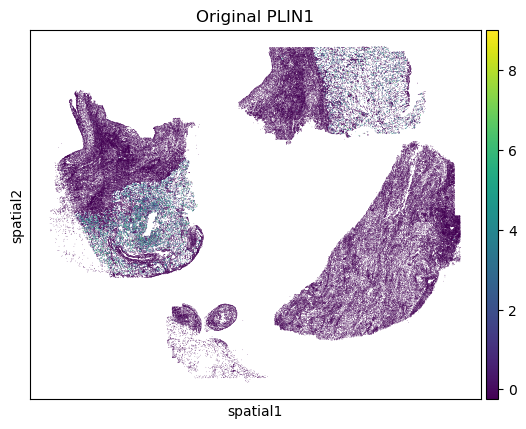

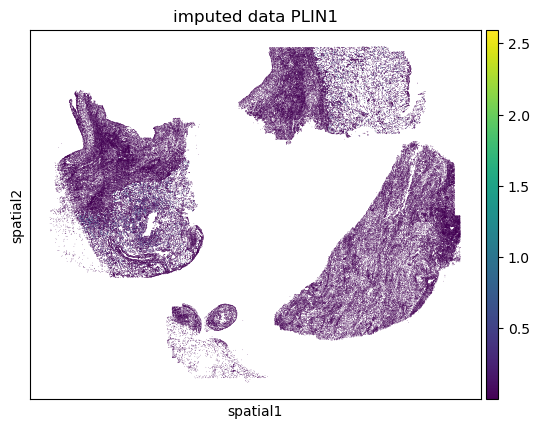

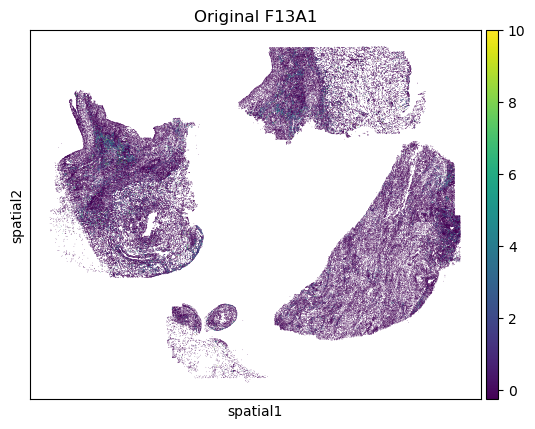

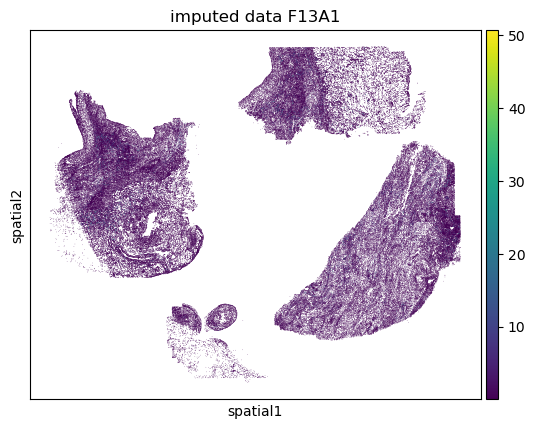

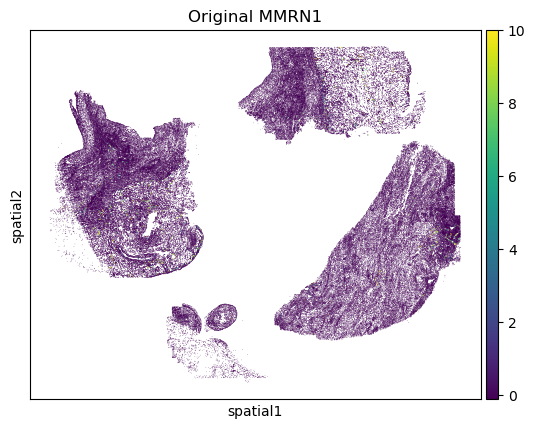

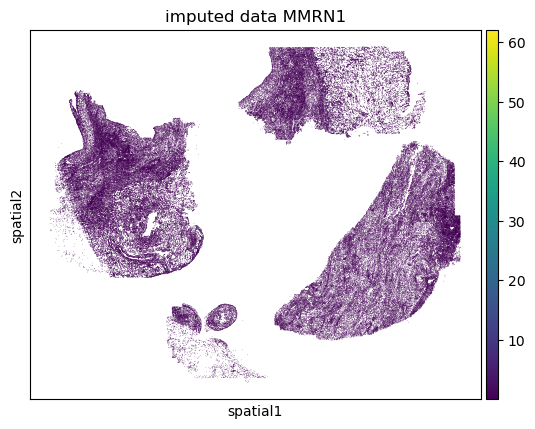

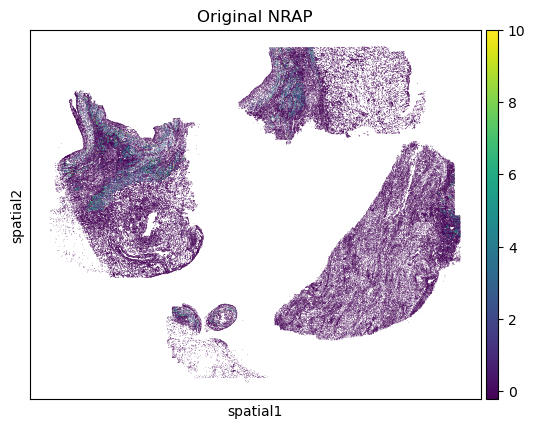

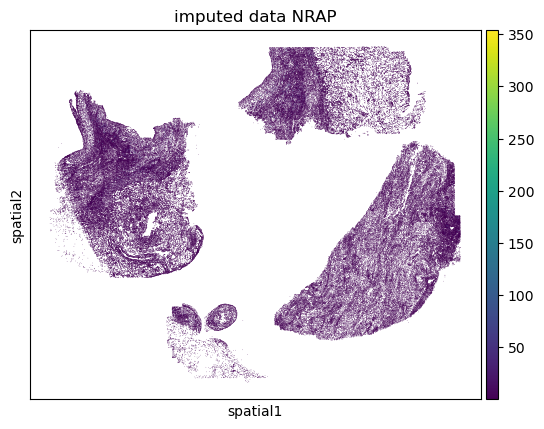

In [42]:
for gene in wgenes:
    sc.pl.embedding(original, basis="spatial", color=gene, title=f"Original {gene}")
    sc.pl.embedding(sp_imp, basis="spatial", color=gene, title=f"imputed data {gene}")

/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be i

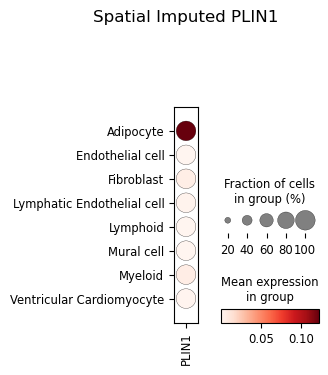

/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be i

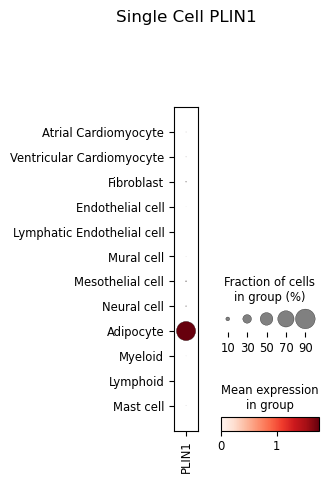

/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be i

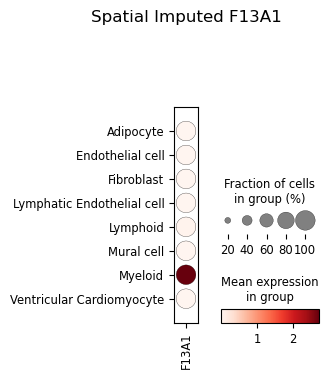

/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be i

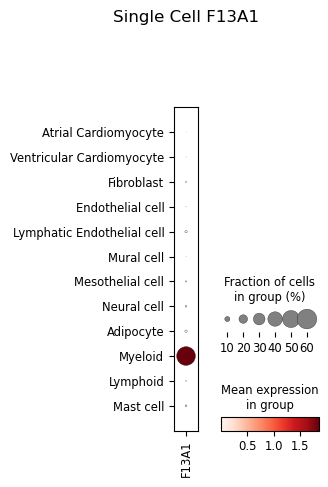

/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be i

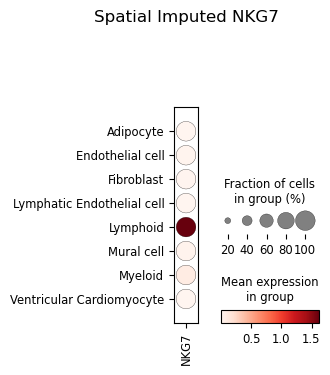

/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be i

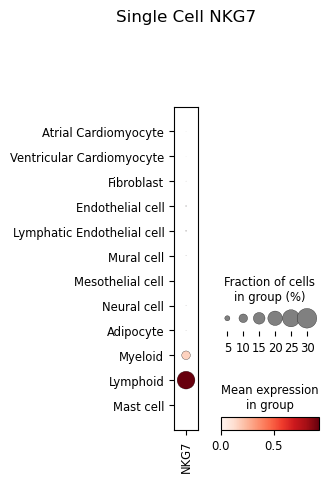

/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be i

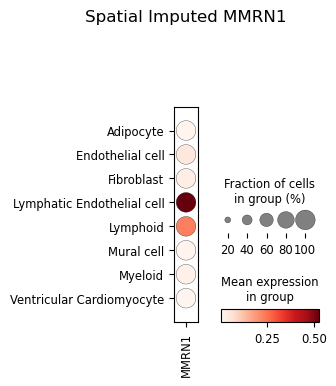

/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be i

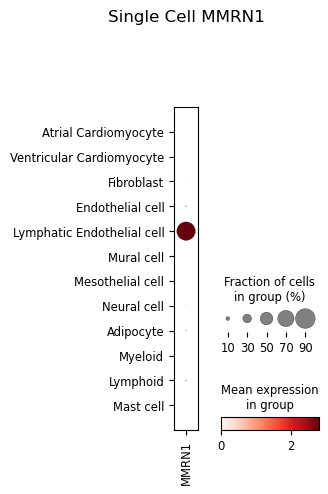

/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be i

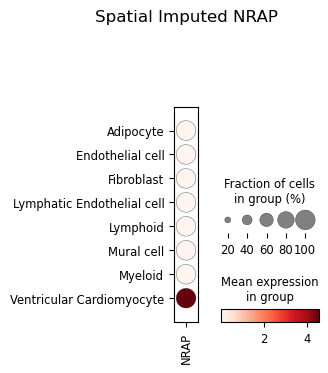

/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/xu262605/anaconda3/envs/spatial_data/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be i

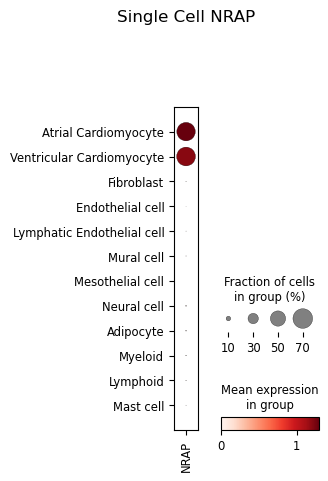

In [46]:
for gene in wgenes:
    sc.pl.dotplot(sp_imp, gene, groupby="cell_type",title=f"Spatial Imputed {gene}")
    sc.pl.dotplot(scref, gene, groupby="cell_type",title=f"Single Cell {gene}")

In [47]:
original

AnnData object with n_obs × n_vars = 217184 × 500
    obs: 'fov', 'volume', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'Cellbound2_raw', 'Cellbound2_high_pass', 'Cellbound3_raw', 'Cellbound3_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'Cellbound1_raw', 'Cellbound1_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'region', 'n_counts', 'leiden_0_5', 'leiden_1', 'leiden_1_5', 'tacco', 'cell_type'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'leiden', 'leiden_0_5_colors', 'leiden_1_5_colors', 'leiden_1_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'tacco_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'blank_genes', 'spatial', 'tacco'
    varm: 'PCs', 'tacco'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [48]:
# Calculate Spearman correlation from two matrices

from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

def spearman_correlation(a, b):
    a = a.toarray().flatten()
    b = b.toarray().flatten()
    print(a.shape, b.shape)
    print(mean_squared_error(a, b))
    return spearmanr(a, b)

In [49]:
# Example
for gene in wgenes:
    print(gene)
    print(spearman_correlation(original[:,gene].X, sp_imp[:,gene].X))

#spearman_correlation(original[:,withheld].X, st_data[:,withheld].X)

PLIN1
(217184,) (217184,)
0.93822587
SpearmanrResult(correlation=0.3362127443234561, pvalue=0.0)
F13A1
(217184,) (217184,)
4.4333525
SpearmanrResult(correlation=0.2901860710448025, pvalue=0.0)
NKG7
(217184,) (217184,)
1.2335409
SpearmanrResult(correlation=0.14525402405561866, pvalue=0.0)
MMRN1
(217184,) (217184,)
0.91235393
SpearmanrResult(correlation=0.15481543456036415, pvalue=0.0)
NRAP
(217184,) (217184,)
21.867826
SpearmanrResult(correlation=0.35589984360288063, pvalue=0.0)


In [51]:
import numpy as np
from scipy import stats

In [55]:
# imp = np.array(sp_imp.X)
# org = np.array(original.X)

# res = stats.spearmanr(org, imp)
# res.statistic

In [54]:
for gene in wgenes:
    print(gene)
    res = stats.spearmanr(np.array(original[:,gene].X), np.array(sp_imp[:,gene].X))
    print(res)

PLIN1
SpearmanrResult(correlation=0.3362127443234561, pvalue=0.0)
F13A1
SpearmanrResult(correlation=0.2901860710448025, pvalue=0.0)
NKG7
SpearmanrResult(correlation=0.14525402405561866, pvalue=0.0)
MMRN1
SpearmanrResult(correlation=0.15481543456036415, pvalue=0.0)
NRAP
SpearmanrResult(correlation=0.35589984360288063, pvalue=0.0)


In [ ]:
wgenes

In [56]:
sp_imp.var

Empty DataFrame
Columns: []
Index: [A2M, ABCA6, ABCA8, ABCA9, ABCC9, ABLIM1, AC022075.1, ACHE, ACKR1, ACSL1, ACSM3, ACTA2, ACTB, ACTG2, ADAM28, ADAMTS17, ADAMTS2, ADAMTS9, ADGRB3, ADGRE2, ADGRF5, ADH1B, ADRB1, AFAP1L1, AFF3, AGT, AGTR1, ANK3, ANKRD44, ANO2, AOAH, AP2A2, APBB1IP, APOE, APP, AQP1, ARHGAP18, ARL15, ASTN2, ATF5, ATP1B3, ATP2B4, ATP8B4, ATXN1, B4GALT1, BASP1, BICC1, BNC1, BTNL9, C15orf41, C1QA, C1QTNF1, C1R, C7, C9, CA4, CACNA1C, CACNA1D, CACNB2, CALCRL, CAMK1D, CAMK4, CASK, CBLB, CCDC141, CCDC80, CCL11, CCL2, CCL21, CCL3, CCL4, CCSER1, CD14, CD163, CD163L1, CD247, CD36, CD3D, CD40LG, CD52, CD63, CD68, CD7, CD74, CD79A, CD8A, CDC14A, CDH13, CDH19, CDH5, CEBPD, CEMIP2, CENPP, CERS6, CFD, CFH, CGNL1, CHRM2, CIITA, CIT, ...]

[5126 rows x 0 columns]

## df to Anndata

In [47]:
test = ['LY9','IL10']

In [51]:
imputed_adata = sc.AnnData(sp_imp.obsm['imputation'])
imputed_adata.obsm['spatial'] = sp_imp.obsm['spatial']
imputed_adata.obs = sp_imp.obs
imputed_adata

AnnData object with n_obs × n_vars = 217184 × 1393
    obs: 'fov', 'volume', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'Cellbound2_raw', 'Cellbound2_high_pass', 'Cellbound3_raw', 'Cellbound3_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'Cellbound1_raw', 'Cellbound1_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'region', 'n_counts', 'leiden_0_5', 'leiden_1', 'leiden_1_5', 'tacco', 'cell_type'
    obsm: 'spatial'

In [57]:
imputed_adata.X

array([[1.3278842e-02, 1.2030551e-02, 1.9336438e-02, ..., 5.3712958e-04,
        2.1736659e-03, 2.9816738e-05],
       [1.7638007e-01, 1.0598034e-02, 2.5499621e-02, ..., 6.6670752e-04,
        8.0589307e-03, 9.5425617e-05],
       [1.3141221e-01, 9.4876718e-03, 2.2383913e-02, ..., 5.1538099e-04,
        6.1880196e-03, 8.1237064e-05],
       ...,
       [1.7224509e-01, 1.4887108e-03, 6.8137799e-03, ..., 6.6212245e-04,
        2.5158541e-03, 1.8080871e-04],
       [1.4732863e-01, 2.0576960e-03, 8.9955423e-03, ..., 2.1016996e-04,
        1.4165087e-03, 7.3080228e-05],
       [8.3246715e-03, 2.9181089e-02, 3.1559844e-02, ..., 4.4600011e-04,
        9.9181221e-04, 7.7036479e-05]], dtype=float32)

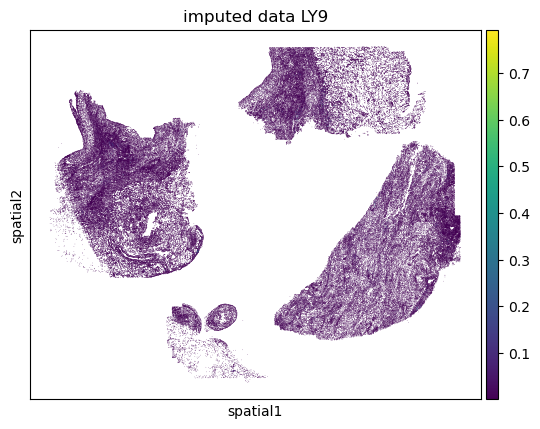

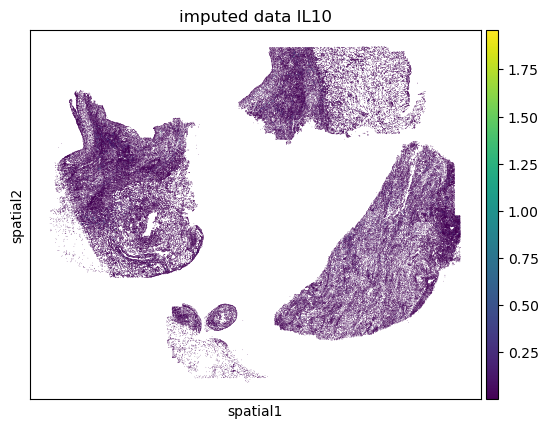

In [56]:
for gene in test:
    sc.pl.embedding(imputed_adata, basis="spatial", color=gene, title=f"imputed data {gene}")